# 2.6 概率

## 2.6.1 基本概率论

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

### distributions包含可参数化的概率分布和采样函数
这允许构造用于优化的随机计算图和随机梯度估计器。
### multinomial.Multinomial

In [2]:
fair_probs = torch.ones([6]) / 6
display(fair_probs)
#在多项分布中，随机抽样一次，得到的结果
# multinomial.Multinomial(1, fair_probs).sample()
#随机抽样10次
# multinomial.Multinomial(10, fair_probs).sample()


tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

我们可以统计1000次投掷后,每个数字被投中了多少次。具体来说，我们计算相对频率作为真实概率的估计

In [12]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts, counts / 1000  # 相对频率作为估计值

(tensor([164., 183., 156., 153., 168., 176.]),
 tensor([0.1640, 0.1830, 0.1560, 0.1530, 0.1680, 0.1760]))

让我们进行500组实验，每组抽取10个样本。

In [24]:
#counts 抽取五百次的结果：torch.size([500,6]))
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts,counts.shape)

tensor([[0., 2., 3., 1., 2., 2.],
        [0., 5., 1., 1., 1., 2.],
        [3., 2., 2., 1., 2., 0.],
        ...,
        [0., 0., 4., 3., 2., 1.],
        [1., 3., 2., 3., 1., 0.],
        [2., 3., 1., 1., 1., 2.]]) torch.Size([500, 6])


In [28]:
# cum_counts 累积的结果，例如第n次骰1的个数，是前n次counts的和                                                       
cum_counts = counts.cumsum(dim=0)
print(cum_counts)

tensor([[  0.,   2.,   3.,   1.,   2.,   2.],
        [  0.,   7.,   4.,   2.,   3.,   4.],
        [  3.,   9.,   6.,   3.,   5.,   4.],
        ...,
        [871., 801., 903., 814., 789., 802.],
        [872., 804., 905., 817., 790., 802.],
        [874., 807., 906., 818., 791., 804.]])


In [26]:
# 将cum_counts根据行求和，最后一个是500*10
cum_counts.sum(dim=1, keepdims=True)

tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],
        [ 300.],
        [ 310.],
        [ 320.],
        [ 330.],
        [ 340.],
        [ 350.],
        [ 360.],
        [ 370.],
        [ 380.],
        [ 390.],
        [ 400.],
        [ 410.],
        [ 420.],
        [ 430.],
        [ 440.],
        [ 450.],
        [ 460.],
        [ 470.],
        [ 480.],
        [ 490.],
        [ 500.],
        [ 510.],
        [ 520.],
        [ 530.],
        [ 540.],
        [ 550.],
        [ 560.],
        [ 570.],
        [ 580.],
        [ 590.

In [27]:
# estimates是每一次抽取的概论
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates)

tensor([[0.0000, 0.2000, 0.3000, 0.1000, 0.2000, 0.2000],
        [0.0000, 0.3500, 0.2000, 0.1000, 0.1500, 0.2000],
        [0.1000, 0.3000, 0.2000, 0.1000, 0.1667, 0.1333],
        ...,
        [0.1749, 0.1608, 0.1813, 0.1635, 0.1584, 0.1610],
        [0.1747, 0.1611, 0.1814, 0.1637, 0.1583, 0.1607],
        [0.1748, 0.1614, 0.1812, 0.1636, 0.1582, 0.1608]])


/home/yuke/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuke/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuke/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuke/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yuke/miniconda3/envs/d2l/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/yuke/miniconda3/envs/d2l/lib/python3.8/si

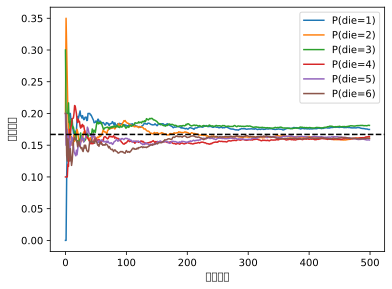

In [29]:
# 绘制图像：随着实验次数的增加，结果为1的概率
d2l.set_figsize((6, 4.5))

#plt.plot的默认x是range(len(estimates[:, 1].numpy()))，结果是range(0, 500)
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
# 设置水平线
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')

# 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，
# 分别表示Get Current Figure和Get Current Axes。
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')

# Legend()参数调整图例位置
d2l.plt.legend();

### 1.概率论公理

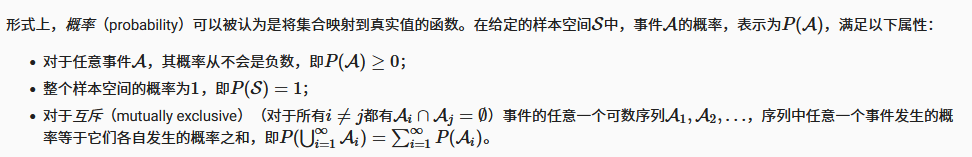

### 2.随机变量
随机变量几乎可以是任何数量，并且不是确定性的。它可以在随机实验的一组可能性中取一个值

散（discrete）随机变量（如骰子的每一面）和连续（continuous）变量（如人的体重和身高）之间存在微妙的区别

### 3.处理多个随机变量

## 2.6.3 处理多个随机变量

### 1.联合概率

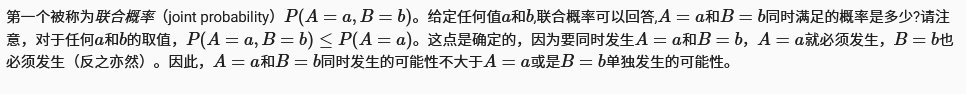

### 2.条件概率

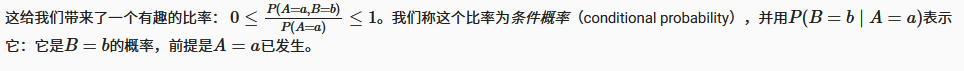

### 3.贝叶斯定理

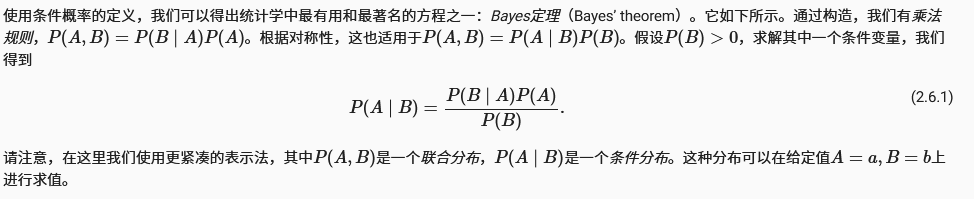

### 4.边际化

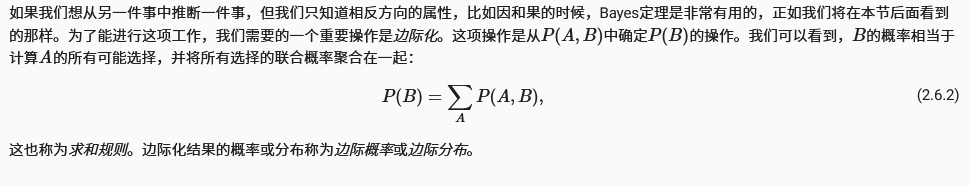

### 5.独立性

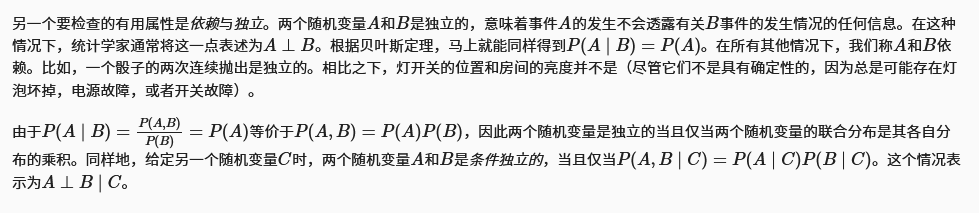

## 2.6.3 期望和差异

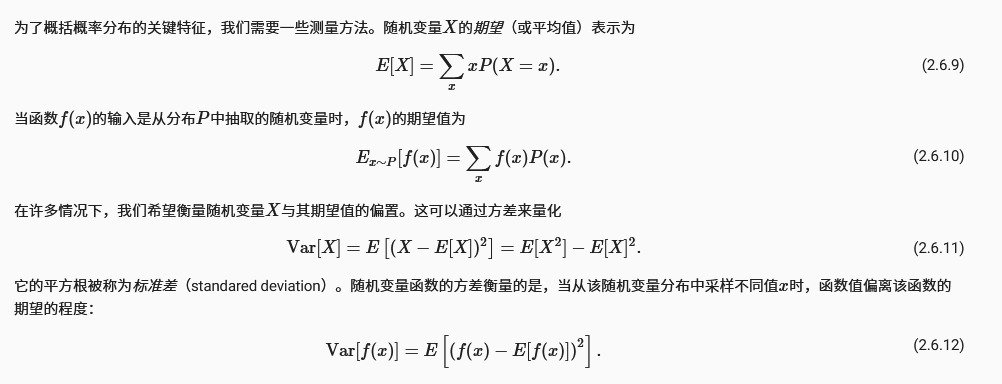

## 2.6.4 小结

我们可以从概率分布中采样。

我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

期望和方差为概率分布的关键特征的概括提供了实用的度量形式。


## 2.6.5 练习

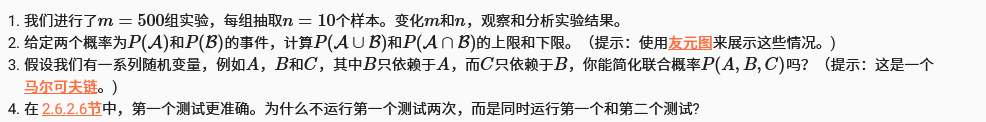